In [3]:
from google.colab import files
uploaded =files.upload()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_excel('Data_Train.xlsx')
df=pd.DataFrame(data)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [10]:
df.shape

(10683, 11)

In [11]:
#drop the nullvalues
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [13]:
duplicates = df[df.duplicated()]
print(duplicates)


           Airline Date_of_Journey    Source Destination  \
683    Jet Airways       1/06/2019     Delhi      Cochin   
1061     Air India      21/05/2019     Delhi      Cochin   
1348     Air India      18/05/2019     Delhi      Cochin   
1418   Jet Airways       6/06/2019     Delhi      Cochin   
1674        IndiGo      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10594  Jet Airways      27/06/2019     Delhi      Cochin   
10616  Jet Airways       1/06/2019     Delhi      Cochin   
10634  Jet Airways       6/06/2019     Delhi      Cochin   
10672  Jet Airways      27/06/2019     Delhi      Cochin   
10673  Jet Airways      27/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
683    DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
1061   DEL → GOI → BOM → COK    22:00  19:15 22 May  21h 15m     2 stops   
1348   DEL → HYD → BOM → COK    17:15  19:15 19 May

In [14]:
df = df.drop_duplicates()

In [15]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []


#**Data Cleaning**#

In [16]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [17]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [18]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [19]:
df.drop('Date_of_Journey' , axis=1,inplace=True)

In [20]:

df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-02-03 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-03 05:50:00,2025-02-03 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-03 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-02-03 18:05:00,2025-02-03 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-02-03 16:50:00,2025-02-03 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [21]:
df['Dep_Time'+'_hour']=df['Dep_Time'].dt.hour
df['Dep_Time'+'_minute']=df['Dep_Time'].dt.minute

In [22]:
df.drop('Dep_Time',axis=1,inplace=True)

In [23]:
df['Arrival_Time'+'_hour']=df['Arrival_Time'].dt.hour
df['Arrival_Time'+'_minute']=df['Arrival_Time'].dt.minute

In [24]:

df.drop('Arrival_Time',axis=1,inplace=True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]  # Adds 0 hours

In [27]:
df['Duration']=duration

In [28]:

df[['Duration_hours', 'Duration_minutes']] = df['Duration'].str.extract('(\d+)h (\d+)m')
df['Duration_hours'] = pd.to_numeric(df['Duration_hours'])
df['Duration_minutes'] = pd.to_numeric(df['Duration_minutes'])


In [29]:
df.drop('Duration',axis=1,inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [31]:
df['Total_Stops'] = df['Total_Stops'].str.strip().str.lower()


In [32]:
stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops'] = df['Total_Stops'].map(stop_mapping).fillna(-1)  # Use -1 for unknown stops


In [33]:

df.dtypes

,0
Airline,object
Source,object
Destination,object
Route,object
Total_Stops,int64
Additional_Info,object
Price,int64
journey_day,int32
journey_month,int32
Dep_Time_hour,int32


In [34]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [35]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


**Airline vs Price Analysis**

From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

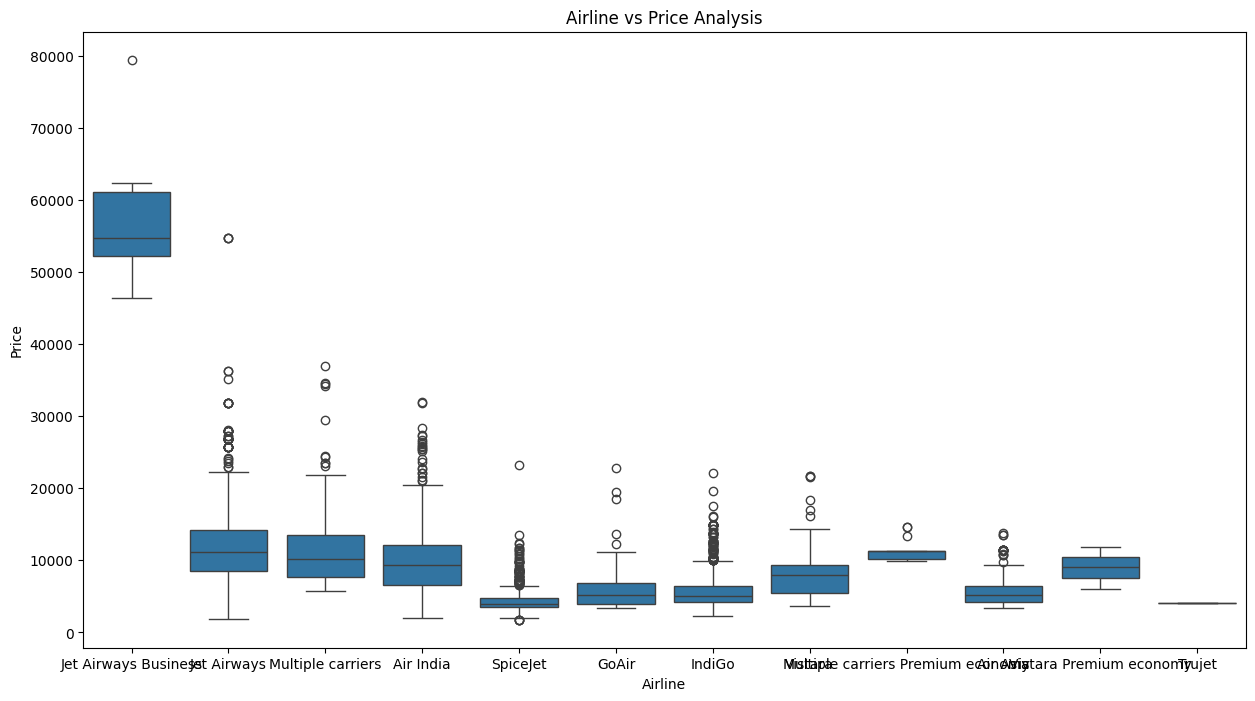

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.title('Airline vs Price Analysis')
plt.show()

In [37]:
df['Source'].value_counts()

,count
Source,
Delhi,4345
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


<Figure size 1500x1500 with 0 Axes>

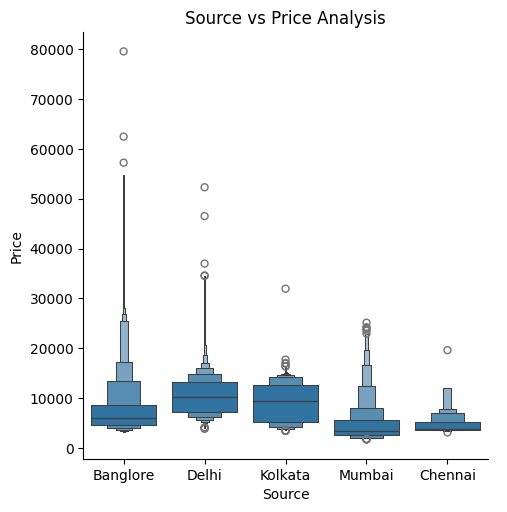

In [38]:
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.title('Source vs Price Analysis')
plt.show()

In [39]:
df['Destination'].value_counts()

,count
Destination,
Cochin,4345
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


<Axes: xlabel='Destination', ylabel='Price'>

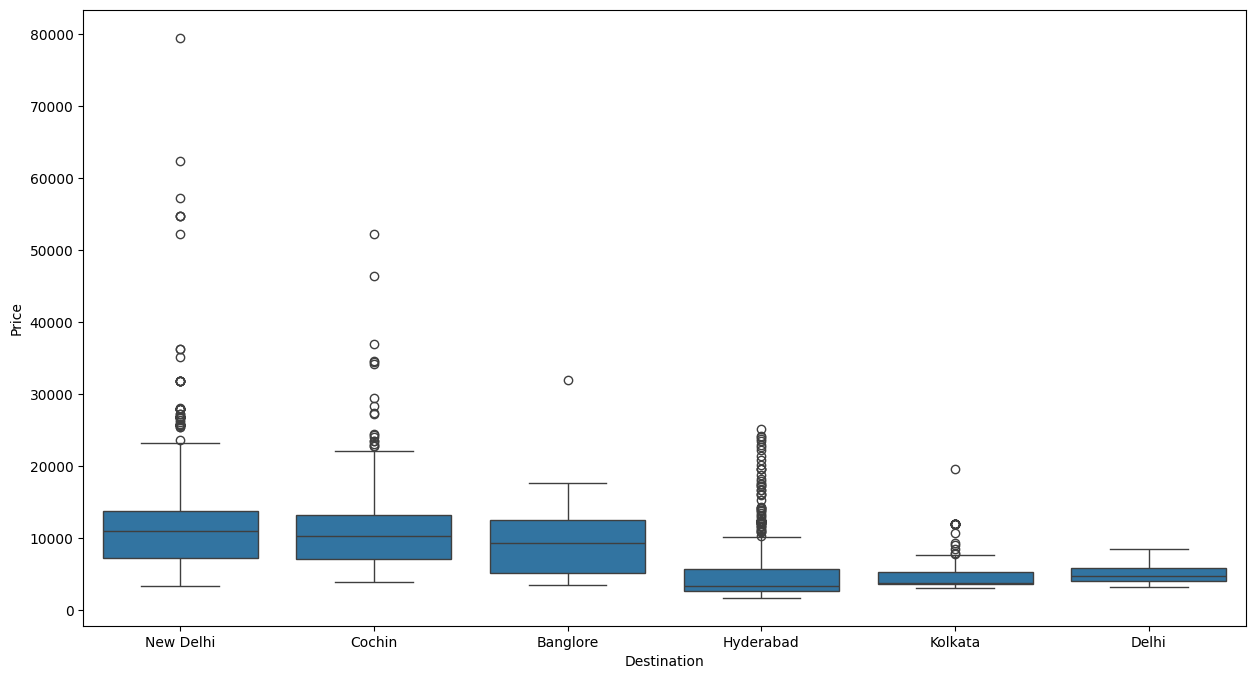

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [41]:

df['Route'].value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → VTZ → BLR,1
CCU → IXZ → MAA → BLR,1
BOM → COK → MAA → HYD,1


In [42]:

df['Total_Stops'].value_counts()

,count
Total_Stops,
1,5625
0,3475
2,1318
3,43
4,1


In [43]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8182
In-flight meal not included,1926
No check-in baggage included,318
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [44]:
df['Additional_Info'] = df['Additional_Info'].replace({
    'No info': 'No Info',
    '1 Long layover': 'Long layover',
    '2 Long layover': 'Long layover',
    '1 Short layover': 'Short layover',
    'Red-eye flight': 'Night flight'
})

In [45]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No Info,8185
In-flight meal not included,1926
No check-in baggage included,318
Long layover,20
Change airports,7
Business class,4
Short layover,1
Night flight,1


**Handling outliers:**

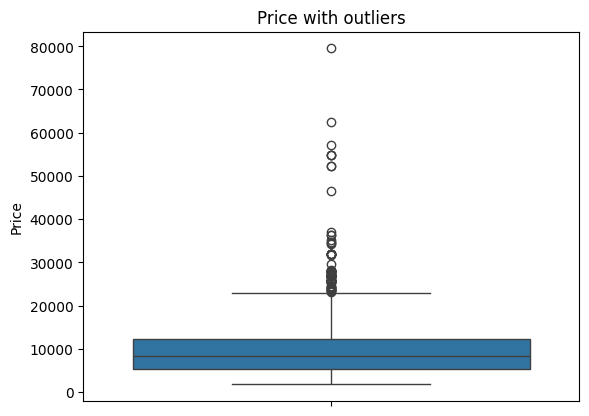

In [46]:
sns.boxplot(df['Price'])
plt.title('Price with outliers')
plt.show()

In [47]:
df['Price']=np.where(df['Price']>=30000,df['Price'].median(),df['Price'])

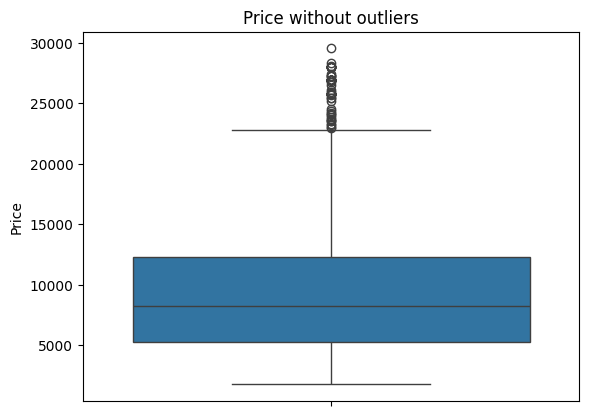

In [48]:
sns.boxplot(df['Price'])
plt.title('Price without outliers')
plt.show()

Data Visualizetion
#**chart elements**#

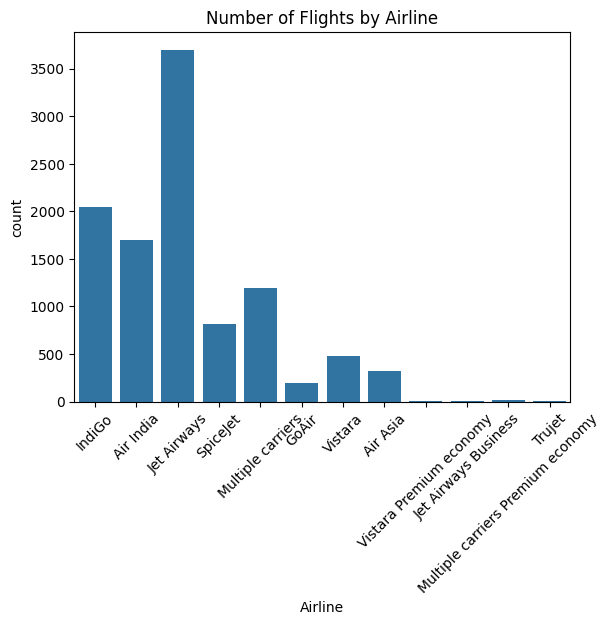

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Airline', data=df)
plt.title("Number of Flights by Airline")
plt.xticks(rotation=45)
plt.show()


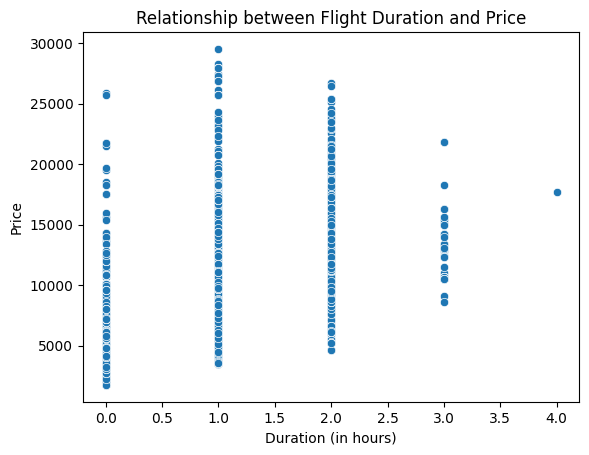

In [50]:
sns.scatterplot(x='Total_Stops', y='Price', data=df)
plt.title("Relationship between Flight Duration and Price")
plt.xlabel("Duration (in hours)")
plt.ylabel("Price")
plt.show()


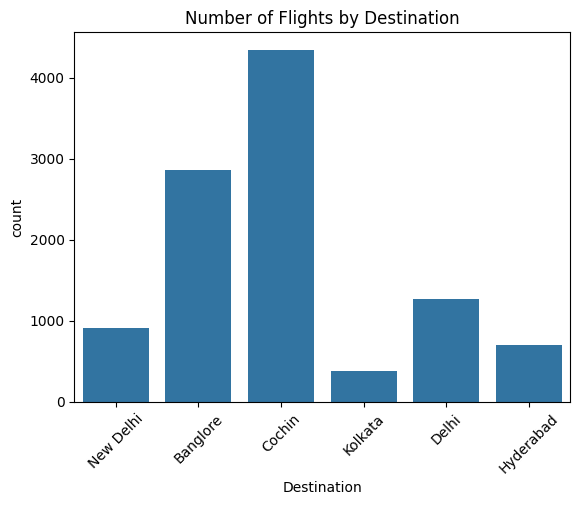

In [51]:
sns.countplot(x='Destination', data=df)
plt.title("Number of Flights by Destination")
plt.xticks(rotation=45)
plt.show()


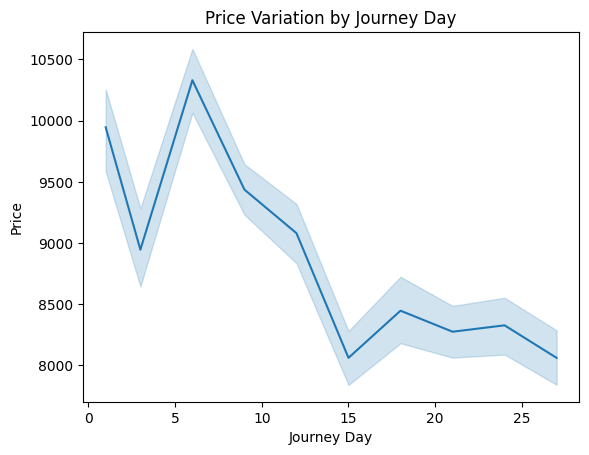

In [52]:
sns.lineplot(x='journey_day', y='Price', data=df)
plt.title("Price Variation by Journey Day")
plt.xlabel("Journey Day")
plt.ylabel("Price")
plt.show()


In [53]:
numerical_data=df[['Price'	, 'journey_day' ,	'journey_month' ,	'Dep_Time_hour',	'Total_Stops','Dep_Time_minute' ,	'Arrival_Time_hour' ,	'Arrival_Time_minute','Duration_hours','Duration_minutes']]

<Axes: >

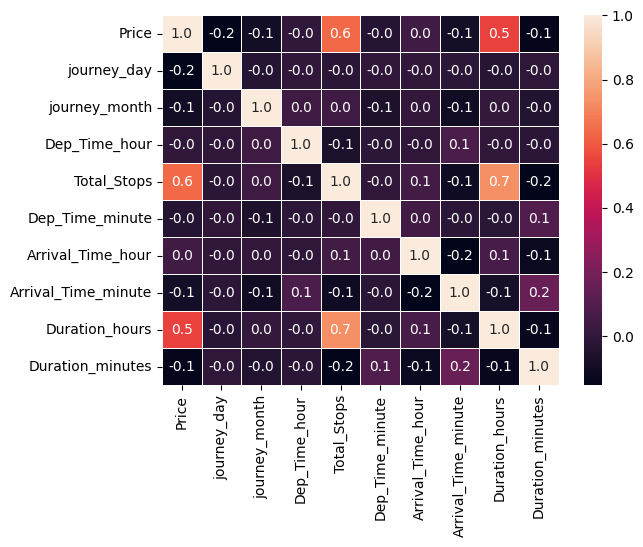

In [54]:
sns.heatmap(numerical_data.corr(),annot=True,fmt='0.1f',linewidth=(.5))

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import GridSearchCV



In [56]:
df.shape

(10462, 15)

In [57]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [58]:
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include="object_")

In [59]:
Num_Columns

,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,0,24,3,22,20,1,10,2,50
1,2,1,5,5,50,13,15,7,25
2,2,9,6,9,25,4,25,19,0
3,1,12,5,18,5,23,30,5,25
4,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30
10679,0,27,4,20,45,23,20,2,35
10680,0,27,4,8,20,11,20,3,0
10681,0,1,3,11,30,14,10,2,40


In [60]:
Cat_Columns

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No Info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No Info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No Info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No Info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No Info
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No Info
10679,Air India,Kolkata,Banglore,CCU → BLR,No Info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No Info
10681,Vistara,Banglore,New Delhi,BLR → DEL,No Info


# **Make Pipeline**

In [62]:
Num_Steps = list()
Num_Steps.append(("Num_Imputer" , KNNImputer()))
Num_Steps.append(("Scaler" , StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [63]:
Cat_Steps = list()
Cat_Steps.append(("Cat_Imputer", SimpleImputer(strategy='most_frequent')))
Cat_Steps.append(("Cat_Encoder", OneHotEncoder(handle_unknown="ignore",sparse_output=False, drop='first')))
Cat_Pipeline = Pipeline(steps=Cat_Steps)


In [64]:
Transformer = ColumnTransformer(transformers=[('Num' , Num_Pipeline , Num_Columns.columns) ,
                                              ('Cat' , Cat_Pipeline , Cat_Columns.columns) ] , remainder='passthrough')

In [ ]:
steps = list()
steps.append(("Preprocessing" , Transformer))
steps.append(("Model" , RandomForestRegressor()))
pipeline = Pipeline(steps=steps)
results = cross_validate(pipeline , x , y , scoring="r2"  ,cv = 5 , return_train_score=True)
print(results["train_score"].mean())
print(results["test_score"].mean())

0.9850032608688724
0.9080294558617521


In [ ]:
steps = list()
steps.append(("Preprocessing" , Transformer))
steps.append(("Model" , LinearRegression(fit_intercept=False,
copy_X=True, n_jobs=-1)))
pipeline = Pipeline(steps=steps)

In [ ]:
results = cross_validate(pipeline , x , y , scoring="r2"  ,cv = 5 , return_train_score=True)

In [ ]:
results["train_score"].mean()

0.751829055989297

In [ ]:
results["test_score"].mean()

0.7395634780852192

In [66]:
models = list()
models.append(("LR" , LinearRegression()))
models.append(("CART" , DecisionTreeRegressor(criterion='gini',max_depth=3,random_state=33)))
models.append(("RF" , RandomForestRegressor(n_estimators=100 , criterion='gini')))




In [68]:
models = list()
models.append(("LR" , LinearRegression(fit_intercept=False,
copy_X=True, n_jobs=-1)))
models.append(("CART" , DecisionTreeRegressor()))
models.append(("RF" , RandomForestRegressor(n_estimators=100 , criterion='squared_error'
)))


pipelines = {}  # Store pipelines for each model

for model_name, model in models:
    steps = list()
    steps.append(("Preprocessing" , Transformer))
    steps.append((model_name, model))  # Use model_name as the step name
    pipeline = Pipeline(steps = steps)

    pipelines[model_name] = pipeline  # Store the pipeline

    scores = cross_validate(pipeline , x , y , scoring="r2"  ,cv = 5 , return_train_score=True)
    print(model_name)
    print("Train_accuracy" , scores["train_score"].mean() )
    print("-" * 10)
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")


# Access parameters of the 'CART' model


LR
Train_accuracy 0.751829055989297
----------
Test_accuracy 0.7395634780852192
--------------------


CART
Train_accuracy 0.9954888974657073
----------
Test_accuracy 0.8540866366753178
--------------------


RF
Train_accuracy 0.984871251017584
----------
Test_accuracy 0.9089256726297361
--------------------




In [69]:
print(pipelines["RF"].get_params())

{'memory': None, 'steps': [('Preprocessing', ColumnTransformer(remainder='passthrough',
                  transformers=[('Num',
                                 Pipeline(steps=[('Num_Imputer', KNNImputer()),
                                                 ('Scaler', StandardScaler())]),
                                 Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')),
                                ('Cat',
                                 Pipeline(steps=[('Cat_Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Cat_Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                      

# **select best Parameters**

In [77]:
params_rf = {
    "Model__n_estimators": [100, 200, 300],  # Number of trees
    "Model__max_depth": [None, 10, 20],     # Maximum depth of each tree
    "Model__min_samples_split": [2, 5, 10], # Minimum samples to split a node
    "Model__min_samples_leaf": [1, 2, 4],   # Minimum samples in a leaf
    "Model__max_features": ["auto", "sqrt", "log2"],  # Features to consider at split
}

In [78]:
steps = list()
steps.append(("Preprocessing", Transformer))
steps.append(("Model", RandomForestRegressor()))
pipeline = Pipeline(steps=steps)

In [79]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=params_rf,
    scoring="r2",         # Use R² for regression tasks
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all processors
    return_train_score=True
)

# Fit the grid search to the data
grid_search.fit(x, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Num',
                                                                         Pipeline(steps=[('Num_Imputer',
                                                                                          KNNImputer()),
                                                                                         ('Scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Durati...
                                                                         Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object'))])),
                                       ('Model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'Model__max_depth': [None, 10, 20],
                         'Model__max_features': ['auto', 'sqrt', 'log2'],
                         'Model__min_samples_leaf': [1, 2, 4],
                         'Model__min_samples_split': [2, 5, 10],
                         'Model__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='r2')

In [80]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'Model__max_depth': None, 'Model__max_features': 'sqrt', 'Model__min_samples_leaf': 1, 'Model__min_samples_split': 2, 'Model__n_estimators': 200}


In [81]:
print("Best R² Score (Cross-Validated):", grid_search.best_score_)


Best R² Score (Cross-Validated): 0.8833071842278517


In [82]:
grid_search.best_estimator_


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num',
                                                  Pipeline(steps=[('Num_Imputer',
                                                                   KNNImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Cat_Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Cat_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object'))])),
                ('Model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=200))])

In [83]:
pipeline.fit(x,y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num',
                                                  Pipeline(steps=[('Num_Imputer',
                                                                   KNNImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Cat_Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Cat_Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object'))])),
                ('Model', RandomForestRegressor())])

# **Saveing and Deployment**

In [84]:
import joblib

In [85]:
joblib.dump(pipeline, "FlightPricePredictor.pkl")
joblib.dump(x.columns.tolist(), "inputs.pkl")

['inputs.pkl']

In [86]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [87]:
%%writefile FlightApp.py

import joblib
import pandas as pd
import numpy as np
import streamlit as st

# تحميل النموذج والمدخلات
Model = joblib.load("FlightPricePredictor.pkl")
Inputs = joblib.load("inputs.pkl")

def prediction(Airline, Source, Destination, Total_Stops, Additional_Info, journey_day, journey_month, Dep_Time_hour, Dep_Time_minute, Arrival_Time_hour, Arrival_Time_minute, Duration_minutes):
    # تجهيز المدخلات
    df = pd.DataFrame(columns=Inputs)
    df.at[0, "Airline"] = Airline
    df.at[0, "Source"] = Source
    df.at[0, "Destination"] = Destination
    df.at[0, "Total_Stops"] = Total_Stops
    df.at[0, "Additional_Info"] = Additional_Info
    df.at[0, "journey_day"] = journey_day
    df.at[0, "journey_month"] = journey_month
    df.at[0, "Dep_Time_hour"] = Dep_Time_hour
    df.at[0, "Dep_Time_minute"] = Dep_Time_minute
    df.at[0, "Arrival_Time_hour"] = Arrival_Time_hour
    df.at[0, "Arrival_Time_minute"] = Arrival_Time_minute
    df.at[0, "Duration_minutes"] = Duration_minutes
    result = Model.predict(df)[0]
    return result

def Main():
    st.title("Flight Price Prediction")

    Airline = st.selectbox("Airline", ["IndiGo", "Air India", "Jet Airways", "SpiceJet", "Vistara", "GoAir", "Multiple carriers"])
    Source = st.selectbox("Source", ["Delhi", "Kolkata", "Banglore", "Mumbai", "Chennai"])
    Destination = st.selectbox("Destination", ["Cochin", "Delhi", "New Delhi", "Banglore", "Hyderabad", "Kolkata"]) #
    Total_Stops = st.selectbox("Total Stops", ["0", "1", "2", "3", "4"])
    Additional_Info = st.selectbox("Additional Info", ["No info", "In-flight meal not included", "No check-in baggage included", "Long layover", "Change airports", "Business class"])
    journey_day = st.slider("Journey Day", min_value=1, max_value=31, step=1, value=15)
    journey_month = st.slider("Journey Month", min_value=1, max_value=12, step=1, value=5)
    Dep_Time_hour = st.slider("Departure Hour", min_value=0, max_value=23, step=1, value=10)
    Dep_Time_minute = st.slider("Departure Minute", min_value=0, max_value=59, step=1, value=30)
    Arrival_Time_hour = st.slider("Arrival Hour", min_value=0, max_value=23, step=1, value=14)
    Arrival_Time_minute = st.slider("Arrival Minute", min_value=0, max_value=59, step=1, value=15)
    Duration_minutes = st.slider("Duration (Minutes)", min_value=30, max_value=1500, step=10, value=120)

    if st.button("Predict"):
        result = prediction(Airline, Source, Destination, Total_Stops, Additional_Info, journey_day, journey_month, Dep_Time_hour, Dep_Time_minute, Arrival_Time_hour, Arrival_Time_minute, Duration_minutes)
        st.text(f"Predicted Flight Price: ₹{result:.2f}")

Main()


Writing FlightApp.py


In [88]:
!streamlit run FlightApp.py

/bin/bash: line 1: streamlit: command not found
